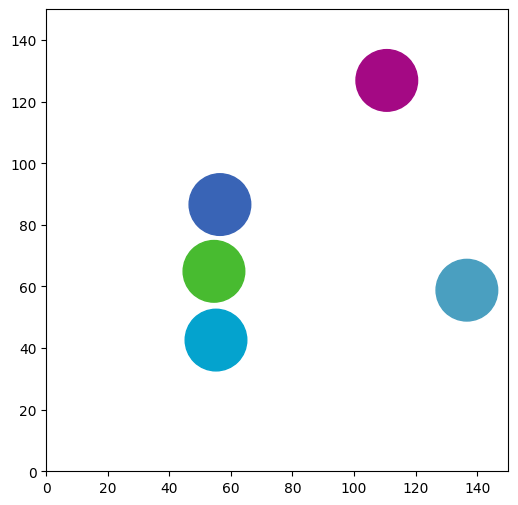

In [1]:
#Debugger 31-08-2023
#Collision Correction - Foi reportado que em algumas colisões elas "pregam"
#Aparentemente as colisões funcionam
#Precisei apelar pro matplot
#Ainda falta a distribuição de Maxwell-Boltzmann

import math
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
import numpy as np

# Constants
FPS = 60
dt = 1/FPS
altura_caixa = 150
largura_caixa = 150

class Particula:
    def __init__(self, massa, raio, vel_x, vel_y, x, y, cor):
        self.massa = float(massa)
        self.raio = float(raio)
        self.vel_x = float(vel_x)
        self.vel_y = float(vel_y)
        self.x = float(x)
        self.y = float(y)
        self.cor = cor
        
    def deslocar(self):
        self.x += self.vel_x * dt
        self.y += self.vel_y * dt
        
        # Colisao parede
        if self.x < self.raio or self.x > largura_caixa - self.raio:
            self.vel_x *= -1
        if self.y < self.raio or self.y > altura_caixa - self.raio:
            self.vel_y *= -1

def check_collision(p1, p2):
    distance = math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
    if distance <= p1.raio + p2.raio:
        return True
    else:
        return False

def resolve_collision(p1, p2):
    x1 = np.array([p1.x, p1.y])
    x2 = np.array([p2.x, p2.y])

    v1 = np.array([p1.vel_x, p1.vel_y])
    v2 = np.array([p2.vel_x, p2.vel_y])

    new_v1 = v1 - (((2 * p2.massa) / (p1.massa + p2.massa)) * ((np.dot((v1 - v2), (x1 - x2))) / ((np.linalg.norm(x1 - x2))**2)) * (x1 - x2))
    new_v2 = v2 - (((2 * p1.massa) / (p1.massa + p2.massa)) * ((np.dot((v2 - v1), (x2 - x1))) / ((np.linalg.norm(x2 - x1))**2)) * (x2 - x1))

    p1.vel_x = new_v1[0]
    p1.vel_y = new_v1[1]
    p2.vel_x = new_v2[0]
    p2.vel_y = new_v2[1]

def create_particle_circles(particles, ax):
    circles = []
    for particle_instance in particles.values():
        circle = Circle((particle_instance.x, particle_instance.y), radius=particle_instance.raio, color=particle_instance.cor)
        ax.add_patch(circle)
        circles.append(circle)
    return circles

def animate(frame, particles, circles):
    for particle_name, particle_instance in particles.items():
        for other_particle_name, other_particle_instance in particles.items():
            if particle_name != other_particle_name and check_collision(particle_instance, other_particle_instance):
                resolve_collision(particle_instance, other_particle_instance)
        
        particle_instance.deslocar()
    
    for circle, particle_instance in zip(circles, particles.values()):
        circle.set_center((particle_instance.x, particle_instance.y))  # Use set_center to update position

def gerar_particula(n_particulas, largura_caixa, altura_caixa):
    particulas = {}
    for particle_index in range(1, n_particulas + 1):
        massa = 10
        raio = 10
        vel_x = random.uniform(-50, 50)
        vel_y = random.uniform(-50, 50)
        x = random.uniform(raio, largura_caixa - raio)
        y = random.uniform(raio, altura_caixa - raio)
        cor = "#%02x%02x%02x" % (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        nome_particula = f"particula_{particle_index}" 
        particle_instance = Particula(massa, raio, vel_x, vel_y, x, y, cor)
        particulas[nome_particula] = particle_instance
    return particulas

def main():
    particles = gerar_particula(5, largura_caixa, altura_caixa)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, largura_caixa)
    ax.set_ylim(0, altura_caixa)
    ax.set_aspect('equal')
    
    circles = create_particle_circles(particles, ax)

    animation = FuncAnimation(fig, animate, fargs=(particles, circles), frames=FPS*5, interval=dt*1, repeat=False)
    animation.save('collision_simulation.gif', writer='pillow')

if __name__ == "__main__":
    main()
